# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БВТ2001 Ильинская Вера

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Алгоритм Флойда-Уоршелла

Матрица дорог: 
[0, 2, inf, 3, 1, inf, inf, 10]
[2, 0, 4, inf, inf, inf, inf, inf]
[inf, 4, 0, inf, inf, inf, inf, 3]
[3, inf, inf, 0, inf, inf, inf, 8]
[1, inf, inf, inf, 0, 2, inf, inf]
[inf, inf, inf, inf, 2, 0, 3, inf]
[inf, inf, inf, inf, inf, 3, 0, 1]
[10, inf, 3, 8, inf, inf, 1, 0]

Дополненная матрица дорог со всеми возможными дорогами от всех точек до всех: 
[0, 2, 6, 3, 1, 3, 6, 7]
[2, 0, 4, 5, 3, 5, 8, 7]
[6, 4, 0, 9, 7, 7, 4, 3]
[3, 5, 9, 0, 4, 6, 9, 8]
[1, 3, 7, 4, 0, 2, 5, 6]
[3, 5, 7, 6, 2, 0, 3, 4]
[6, 8, 4, 9, 5, 3, 0, 1]
[7, 7, 3, 8, 6, 4, 1, 0]


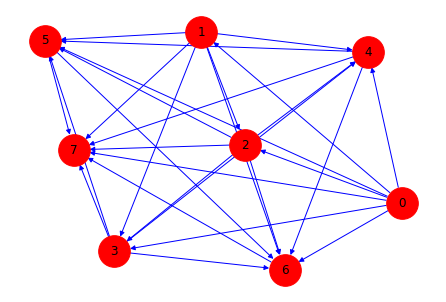

In [35]:
#дополнение матрицы дорог кратчайшими расстояниями между всеми вершинами взвешенного ориентированного графа
#ищем новые маршруты между точками (может работать с отрицательными дугами, но с ними в конце получаются страааанные вещи)

import math
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

try:
  #считываем текстовый файл
  with open("/content/drive/MyDrive/CIAOD and VVIT/Lab6Files/FloUorAlgo.txt", "r", encoding = "utf-8") as fileFloUor:
    matrix = [[int(num) for num in line.split(',')] for line in fileFloUor] #загружаем матрицу дорог графа

    #ниже на нулях в матрице (кроме j) ставила бесконечность, т.к иначе всё работает не правильно
    for i in range(len(matrix)):
      for j in range(len(matrix[i])):
          if (i!=j and matrix[i][j] == 0):
              matrix[i][j] = math.inf

    print("Матрица дорог: ")
    for i in matrix:
      print(i)
    
    N = len(matrix) #число вершин
    # T = [[matrix for matrix in range(N)] for u in range(N)] #список промежуточных вершин, через которые проходим

    #сам алгоритм 
    for k in range(N):
      for i in range(N):
        for j in range(N):
          point = matrix[i][k] + matrix[k][j] #сумма маршрута через доп.вершину
          if (matrix[i][j] > point): #если длина данного маршрута меньше того, что прописан матрицы (и тем более если в матрице его нету)
            matrix[i][j] = point #дополняем и заменяем в матрице дорог маршрут
            # T[i][j] = point #записываем в список номер вершины, через которую нужно пройти, чтобы дойти из точки j в точку i (вершина k)
    
    print("\nДополненная матрица дорог со всеми возможными дорогами от всех точек до всех: ")
    for i in matrix:
      print(i)
    
    #отрисовка графа со всеми маршрутами
    graph = nx.Graph(np.matrix(matrix))
    nx.draw(graph, pos = nx.spring_layout(graph), edge_color = 'b', node_color = 'r', with_labels = True, node_size = 1000, arrows = True)

except FileNotFoundError:
  print("Файл не был найден") 

###Алгоритм Дейкстры

In [41]:
#алгоритм нахождения кратчайших путей от вершины 0 до всех остальных вершин

import math
import networkx as nx
import matplotlib.pyplot as plt

try:
  #считываем текстовый файл
  with open("/content/drive/MyDrive/CIAOD and VVIT/Lab6Files/DijkstraAlgo.txt", "r", encoding = "utf-8") as fileDij:
    matrix = [[int(num) for num in line.split(',')] for line in fileDij] #загружаем матрицу дорог графа

    print("Матрица дорог(вершины 0-5): ")
    for i in matrix:
      print(i)
    
    # print("\nОтображение графа: ")
    # G = nx.Graph()
    # G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(3,5),(3,6),(4,6),(5,6)])
    # nx.draw(G, with_labels = True, edge_color = 'b', node_color = 'r', node_size = 1000, arrows = True)
    # plt.show()

    N = len(matrix) #число вершин в нашем графе
    T = [math.inf] * N #финальная строка длин дорог (inf - бесконечность)
    startV = 0 #стартовая вершина
    viewedV = {startV} #множество просмотренных вершин (в зависимости от стартовой вершины)
    T[startV] = 0 #нулевой вес стартовой вершины должен быть равен 0!

    #метод перебора всех связанных вершин
    #просматриваем все веса других, связанных с startV, вершин, и возвращаем вершину с мин.значением
    def getLinkWithV(startV, matrix):
      for i, weight in enumerate(matrix[startV]): #берём веса из графа 
        if (weight > 0):
          yield i

    #метод нахождения в таблице вершины с мин.весом
    def findMinWei(T, viewedV):
      amin = -1 #начальный минимум, начальное состояние
      m = max(T) #находим макс.значение финимальной строки длин дорог
      for i, t in enumerate(T):
        if (t < m and i not in viewedV): #находим мин.значение вершин, которые не были ещё рассмотрены
            m = t
            amin = i
      return amin #возвращаем вершину с мин.значением

    #заполяем T-табличку мин.весами
    while (startV != -1): #цикл для прохождению по вершинам (если -1, то по всем вершинам прошли)
      for j in getLinkWithV(startV, matrix): #перебераем все связанные вершины с вершиной startV
        if (j not in viewedV): #если рассматриваемая строка таблицы не была просмотрена
          wei = T[startV] + matrix[startV][j] #получаем путь, что прошли до минимальной вершины
          if (wei < T[j]): #если вес меньше последней позиции нашей финальной строки
            T[j] = wei #присваиваем минимальное значение, то есть меняем мин.длину
      #должны найти мин.аргумент между последней строчкой и множеством, что уже было просмотрено
      startV = findMinWei(T, viewedV) #находим мин.значение вершины
      if (startV > 0):
        viewedV.add(startV)
    print("\nДлины кратчайших путей от вершины 0 до всех остальных вершин соотвественно: ")
    print(T)


    # print("\nОтображение кратчайшего расстояния между вершиной 1 и всеми остальными вершинами: ")
    # G = nx.Graph()
    # G.add_edge('1', '2', width = 10)  
    # G.add_edge('1', '4', width = 1.0)  
    # nx.draw(G, with_labels = True, edge_color = 'b', node_color = 'r', node_size = 1000)
    # plt.show()

    # graph = nx.Graph(np.array(T))
    # nx.draw(graph, pos = nx.spring_layout(graph), edge_color = 'b', node_color = 'r', with_labels = True, node_size = 1000, arrows = True)
    
except FileNotFoundError:
  print("Файл не был найден") 

Матрица дорог(вершины 0-5): 
[0, 3, 1, 3, 0, 0]
[3, 0, 4, 0, 0, 0]
[1, 4, 0, 0, 7, 5]
[3, 0, 0, 0, 0, 2]
[0, 0, 7, 0, 0, 4]
[0, 0, 5, 2, 4, 0]

Длины кратчайших путей от вершины 0 до всех остальных вершин соотвественно: 
[0, 3, 1, 3, 8, 5]


###Алгоритм Беллмана-Форда

In [40]:
#нахождения кратчайшего пути от стартовой вершины до всех других вершин (похоже на Дейкстры)
#можем работать с графами, в которых есть отрицательные рёбра 

import math
import networkx as nx
import matplotlib.pyplot as plt

try:
  #считываем текстовый файл
  with open("/content/drive/MyDrive/CIAOD and VVIT/Lab6Files/DijkstraAlgo.txt", "r", encoding = "utf-8") as fileBF: #использую тот же файл, что и для Дейкстры
    matrix = [[int(num) for num in line.split(',')] for line in fileBF] #загружаем матрицу дорог графа
    
    #ниже на нулях в матрице (кроме j) ставила бесконечность, т.к иначе всё работает не правильно
    for i in range(len(matrix)):
      for j in range(len(matrix[i])):
          if (i!=j and matrix[i][j] == 0):
              matrix[i][j] = math.inf

    print("Матрица дорог (вершины 0-5): ")
    for i in matrix:
      print(i)

    startV = 1 #стартовая вершина

    N = len(matrix) #число вершин в нашем графе
    T = [math.inf] * N #финальная строка длин дорог (inf - бесконечность)
    T[startV] = 0

    #пересчёт финального массива путей
    for k in range(1, N):
        for i in range(N):
            for j in range(N):
                if (T[j] + matrix[j][i] < T[i]):
                    T[i] = T[j] + matrix[j][i]
    
    print("\nДлины кратчайших путей от вершины 1 до всех остальных вершин соотвественно: ")
    print(T)

except FileNotFoundError:
  print("Файл не был найден") 

Матрица дорог (вершины 0-5): 
[0, 3, 1, 3, inf, inf]
[3, 0, 4, inf, inf, inf]
[1, 4, 0, inf, 7, 5]
[3, inf, inf, 0, inf, 2]
[inf, inf, 7, inf, 0, 4]
[inf, inf, 5, 2, 4, 0]

Длины кратчайших путей от вершины 1 до всех остальных вершин соотвественно: 
[3, 0, 4, 6, 11, 8]


###Алгоритм Джонсона

In [ ]:
#как и в Флойда-Уоршелла, находим кратчайшие пути между всеми парами вершин во взвешенном ориентированном графе (также с возможностью работы с отрицательными весами)
#смысл - изменить отрицательные дуги на положительные, дабы всё работало хорошо



### Вывод